In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
import sys
import sklearn

In [4]:
print('Dimensions of the  dataset:',df.shape)

Dimensions of the  dataset: (225745, 79)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [6]:
dropdf= df.dropna()
dropdf.shape

(225741, 79)

In [7]:
dropdf.isna().any()[lambda x:x]

Series([], dtype: bool)

In [8]:
del dropdf['Flow Bytes/s']
del dropdf[' Flow Packets/s']

In [14]:
df.iloc[0]

 Destination Port               54865
 Flow Duration                      3
 Total Fwd Packets                  2
 Total Backward Packets             0
Total Length of Fwd Packets        12
                                ...  
Idle Mean                           0
 Idle Std                           0
 Idle Max                           0
 Idle Min                           0
 Label                         BENIGN
Name: 0, Length: 79, dtype: object

In [16]:
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(dropdf,test_size = 0.20)
print(df_train.shape)
print(df_test.shape)

(180592, 77)
(45149, 77)


In [17]:
print('Label distribution Training set:')
print(df_train[' Label'].value_counts())
print()
print('Label distribution Test set:')
print(df_test[' Label'].value_counts())

Label distribution Training set:
DDoS      102504
BENIGN     78088
Name:  Label, dtype: int64

Label distribution Test set:
DDoS      25523
BENIGN    19626
Name:  Label, dtype: int64


In [34]:
# Setting the new value

labeldf=df_train[' Label']
print(labeldf)


82357     1
165849    0
195170    0
16696     0
25669     1
         ..
117498    1
70832     0
119871    0
145484    1
148967    1
Name:  Label, Length: 180592, dtype: int64


In [29]:
labeldf_test=df_test[' Label']
print(labeldf_test)
#change the label column

213092    0
77480     1
86740     0
55361     1
148583    1
         ..
109166    1
168609    1
105911    1
8291      0
175626    0
Name:  Label, Length: 45149, dtype: int64


In [ ]:
newlabeldf_test=labeldf_test.replace({ 'BENIGN' : 0, 'DDoS' : 1 })
#print(newlabeldf)
 
df_train[' Label'] = newlabeldf
df_test[' Label'] = newlabeldf_test
#print(df_train[' Label'])

In [43]:

X_df_train=df_train.drop(' Label',1)
Y_df_train=df_train[' Label']
X_df_test=df_test.drop(' Label',1)
Y_df_test=df_test[' Label']
X_df_train
Y_df_train

82357     1
165849    0
195170    0
16696     0
25669     1
         ..
117498    1
70832     0
119871    0
145484    1
148967    1
Name:  Label, Length: 180592, dtype: int64

In [44]:
colNames=list(X_df_train)
colNames_test=list(X_df_test)
X_df_train.shape
print(colNames)

[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Fl

In [45]:
print(X_df_train)
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit(X_df_train)
X_df_train=scaler1.transform(X_df_train) 
# test data
scaler2 = preprocessing.StandardScaler().fit(X_df_test)
X_df_test=scaler2.transform(X_df_test) 

         Destination Port   Flow Duration   Total Fwd Packets  \
82357                  80         8690149                   7   
165849              59176         8007924                   1   
195170              50297        12654906                   1   
16696                  53             470                   1   
25669                  80           47049                   4   
...                   ...             ...                 ...   
117498                 80          450400                   3   
70832               58281        12091889                   1   
119871                 53             499                   1   
145484                 80         1658380                   3   
148967                 80         2214098                   4   

         Total Backward Packets  Total Length of Fwd Packets  \
82357                         4                           50   
165849                        6                            6   
195170                     

In [46]:
print(X_df_train.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [47]:
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore')
selector=SelectPercentile(f_classif, percentile=10)
X_newdf_train = selector.fit_transform(X_df_train,Y_df_train)
X_newdf_train.shape

/Users/buseyarentekin/opt/anaconda3/envs/reinforcementenv/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [29 30 31 47 54 55 56 57 58 59] are constant.
  UserWarning)


(180592, 8)

In [48]:
true=selector.get_support()
newcolindex_DDoS=[i for i, x in enumerate(true) if x]
newcolname_DDoS=list( colNames[i] for i in newcolindex_DDoS )
newcolname_DDoS

[' Destination Port',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' Packet Length Mean',
 ' URG Flag Count',
 ' Average Packet Size',
 ' Avg Bwd Segment Size']

In [49]:
print('Features selected for DDoS:',newcolname_DDoS)

Features selected for DDoS: [' Destination Port', 'Bwd Packet Length Max', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Packet Length Mean', ' URG Flag Count', ' Average Packet Size', ' Avg Bwd Segment Size']


In [50]:
'''from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y_df_train) '''

'from sklearn import preprocessing\nfrom sklearn import utils\n\nlab_enc = preprocessing.LabelEncoder()\nencoded = lab_enc.fit_transform(Y_df_train) '

In [51]:
Y_df_train=Y_df_train.astype('int')

In [52]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_newdf_train, Y_df_train)
print ("DDoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 1), rfe.ranking_), newcolname_DDoS)))

DDoS Features sorted by their rank:
[(1, ' Destination Port'), (2, ' Average Packet Size'), (3, ' Packet Length Mean'), (4, ' Bwd Packet Length Std'), (5, ' Bwd Packet Length Mean'), (6, ' Avg Bwd Segment Size'), (7, ' URG Flag Count'), (8, 'Bwd Packet Length Max')]


In [53]:
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=8, step=1)
rfe.fit(X_df_train, Y_df_train)
X_rfeDDoS=rfe.transform(X_df_train)
true=rfe.support_
rfecolindex_DDoS=[i for i, x in enumerate(true) if x]
rfecolname_DDoS=list(colNames[i] for i in rfecolindex_DDoS)

In [54]:
print('Features selected for DDoS:',rfecolname_DDoS)

Features selected for DDoS: [' Destination Port', 'Total Length of Fwd Packets', ' Fwd Packet Length Max', ' Bwd Packet Length Mean', ' Flow IAT Std', ' Fwd IAT Min', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward']


In [55]:
print(X_rfeDDoS.shape)

(180592, 8)


In [56]:
# all features
clf_DDoS=DecisionTreeClassifier(random_state=0)
clf_DDoS.fit(X_df_train, Y_df_train)

DecisionTreeClassifier(random_state=0)

In [57]:
#selected features
clf_rfeDDoS=DecisionTreeClassifier(random_state=0)
clf_rfeDDoS.fit(X_rfeDDoS, Y_df_train)

DecisionTreeClassifier(random_state=0)

In [58]:
Y_df_train_pred=clf_DDoS.predict(X_df_test)
# Create confusion matrix
pd.crosstab(Y_df_test, Y_df_train_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,18738,888
1,16327,9196


In [59]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99956 (+/- 0.00052)
Precision: 0.99957 (+/- 0.00089)
Recall: 0.99965 (+/- 0.00065)
F-measure: 0.99961 (+/- 0.00046)


In [61]:
pip install seaborn

     |████████████████████████████████| 285 kB 798 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
newcolname_DDoS

[' Destination Port',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' Packet Length Mean',
 ' URG Flag Count',
 ' Average Packet Size',
 ' Avg Bwd Segment Size']

In [127]:
x=newcolname_DDoS[1]
y=newcolname_DDoS[3]

In [128]:
df_2 =df_test.iloc[:1000]
df_2

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
213092,53,31290,4,2,128,180,32,32,32.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
77480,80,1081443,3,6,26,11601,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
86740,443,5191787,5,1,123,46,46,0,24.600000,23.276598,...,32,49430.0,0.0,49430,49430,5123800.0,0.0,5123800,5123800,0
55361,80,1494722,5,0,30,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
148583,80,10423865,4,0,24,0,6,6,6.000000,0.000000,...,20,1179.0,0.0,1179,1179,10400000.0,0.0,10400000,10400000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149332,80,6576791,4,0,24,0,6,6,6.000000,0.000000,...,20,975.0,0.0,975,975,6575816.0,0.0,6575816,6575816,1
114060,80,9123627,8,6,56,11607,20,0,7.000000,5.656854,...,20,44031.0,0.0,44031,44031,8037552.0,0.0,8037552,8037552,1
45997,80,11259721,4,0,24,0,6,6,6.000000,0.000000,...,20,1039.0,0.0,1039,1039,11300000.0,0.0,11300000,11300000,1
28686,80,82197,3,6,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


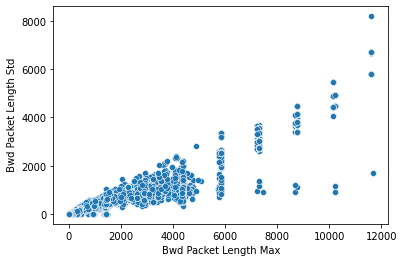

<Figure size 432x288 with 0 Axes>

In [130]:
sns.scatterplot(data = df, x = x, y = y)
plt.show()
plt.savefig('Visualize-DestinationvsBwdPacketLength.jpg')